In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pprint import pprint
import math
from pprint import pprint

from matplotlib.pyplot import figure, show
from numpy.random import rand

import mpld3
mpld3.enable_notebook()

%matplotlib notebook


In order to determine popular words used in well-liked Youtube videos, we first need to determine which metric is most useful for our comedy videos.  Using the Youtube trending video data set (https://www.kaggle.com/quannguyen135/what-is-trending-on-youtube-eda-with-python/data), we will do the following:

1. See the average number of likes, dislikes, and comments by category to determine which metric is most useful for entertainment and comedy.
2. two
3. three


In [2]:
#load trending videos
trending_videos = pd.read_csv('USvideos.csv')

#update types as follows:
#integer:  views, like,s dislikes, and comment_count
#string:  category_id
type_int_list = ['views', 'likes', 'comment_count', 'dislikes']
for column in type_int_list:
    trending_videos[column] = trending_videos[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    trending_videos[column] = trending_videos[column].astype(str)

#group trending videos by days trending
top_trending_videos_days = trending_videos.groupby(['title']).size().reset_index(name='trending_days_count').sort_values(['trending_days_count'], ascending=[False])

top_trending_videos_days.head(10)

,title,trending_days_count
3618,"Selena Gomez, Marshmello - Wolves",18
2760,Maroon 5 - Wait,18
2622,Lucas the Spider - Polar Bear,16
849,Chris Young - Hangin' On,16
51,*cough*,16
1425,Fluffy Sleepy Whispers ASMR,15
4705,Why Bridges Move...,15
1571,Gotta Catch ‘Em All!,15
2691,Made in Miami (Artist Spotlight Story) - Camil...,15
3364,Ralph Breaks The Internet: Wreck-It Ralph 2 Of...,15


In [183]:
# load id category
# creates a dictionary that maps `category_id` to `category`
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

#set a new 'category' column using the newly-created dictionary
trending_videos['category'] = trending_videos['category_id'].map(id_to_category)

#set a new 'like_score' column that represents the ratio likes:views
trending_videos['like_score'] = trending_videos['likes']/trending_videos['views']


In [4]:
#function to reject outliers
def reject_outliers(data,col, m):
    return data[abs(data[col] - np.mean(data[col])) < m * np.std(data[col])]

In [ ]:
def stacked_plot(df, type_plot_list, category_list, barwidth, adj_bottom):

    plt.figure(figsize=(10, 8))

    cat_count = len(category_list)
    ind = np.arange(cat_count)
    
    #loop through to create lists for bars, and cumulative bottom for each stack
    list_counter = 0
    levels=[]
    stacks=[]
    for i in type_plot_list:
        stacks.append(list(df[i]))
        if list_counter == 0:
            levels.append([0]*cat_count)
        else:
            levels.append([x + y for x, y in zip(levels[list_counter-1], stacks[list_counter-1])])

        plt.bar(ind, stacks[list_counter],bottom=levels[list_counter], width=barwidth, edgecolor='white')

        list_counter = list_counter + 1



    plt.ylabel('User Interactions')
    plt.title('Interactions by type')
    plt.xticks(ind, category_list)
    plt.legend(type_plot_list)

    plt.xticks(rotation=90)
    plt.show()
    plt.gcf().subplots_adjust(bottom=adj_bottom)  

In [5]:
#barplot function
def barplot_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y, adj_bottom):
    
    plt.figure(figsize=(figsize_x, figsize_y))
    
    if cat == 'ALL':
            result = df.groupby([x_axis])[y_axis].aggregate(np.mean).reset_index().sort_values(y_axis,ascending=[False])
            sns.barplot(x=x_axis, y=y_axis, data=df.head(num_data), order=result[x_axis])
            plt.title('Top ' + x_axis.capitalize() + ' by ' + y_axis.capitalize())
    else:
        result = df[df['category'] == cat].sort_values([y_axis], ascending = [False]).head(num_data).groupby([x_axis])[y_axis].aggregate(np.mean).reset_index().sort_values(y_axis,ascending=[False])
        sns.barplot(x=x_axis, y=y_axis, data=df[df['category'] == cat].sort_values([y_axis], ascending = [False]).head(num_data), order=result[x_axis])
        plt.title('Top ' + x_axis.capitalize() + ' by ' + y_axis.capitalize() + ' - ' + cat)

    sns.set(style="darkgrid")
    
    plt.xticks(rotation=90)
    plt.show()
    plt.gcf().subplots_adjust(bottom=adj_bottom)  

In [6]:
#histogram function
def histogram_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y, adj_bottom):
    
    plt.figure(figsize=(figsize_x, figsize_y))
    
    if cat == 'ALL':            
            plt.hist(df[y_axis], color='red',label=y_axis, bins=100)  
            plt.xlabel(y_axis.capitalize())
            plt.legend(loc='upper right')
            plt.title('Histogram - Youtube Trending Video ' + y_axis.capitalize())    
    else:
        plt.hist(df[df['category'] == cat][y_axis], color='red',label=y_axis, bins=100)  
        plt.xlabel(y_axis.capitalize())
        plt.legend(loc='upper right')
        plt.title('Histogram - Youtube Trending Video ' + y_axis.capitalize() + ' - ' + cat.capitalize())
    
    plt.xticks(rotation=90)
    plt.show()
    plt.gcf().subplots_adjust(bottom=adj_bottom)  

In [7]:
#boxplot function
def boxplot_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y, adj_bottom):
    
    plt.figure(figsize=(figsize_x, figsize_y))
    
    if cat == 'ALL':            
            sns.boxplot(x='category', y=y_axis,data=df) 
            sns.despine(offset=10, trim=True)            
            plt.ylabel(y_axis.capitalize())
            plt.legend(loc='upper right')
            plt.title('Boxplot - Youtube Trending Video ' + y_axis.capitalize())    
    
    plt.xticks(rotation=90)
    plt.show()
    plt.gcf().subplots_adjust(bottom=adj_bottom)  

In [8]:
#create scatterplot function
def scatterplot_youtube_old(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y):

    fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
    #fig.set_figheight(figsize_y)
    #fig.set_figwidth(figsize_x)

    
    if cat == 'ALL':            
        scatter = ax.scatter(df[x_axis],df[y_axis])   
        labels = list(df['title'])
        ax.set_xlabel(x_axis.capitalize())
        ax.set_ylabel(y_axis.capitalize())
        ax.set_title(x_axis.capitalize() + ' vs. ' + y_axis.capitalize())

    else:
        scatter = ax.scatter(df[df['category'] == cat][x_axis], df[df['category'] == cat][y_axis])
        labels = list(df[df['category'] == cat]['title'])
        ax.set_xlabel(x_axis.capitalize())
        ax.set_ylabel(y_axis.capitalize())
        ax.set_title(x_axis.capitalize() + ' vs. ' + y_axis.capitalize() + ' - ' + cat.capitalize())
        
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    #mpld3.enable_notebook()
    mpld3.show()

In [9]:
#create scatterplot function
def scatterplot_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y):

    plt.figure(figsize=(figsize_x, figsize_y))
    
    if cat == 'ALL':            
        plt.scatter(df[x_axis],df[y_axis])  
        plt.xlabel(x_axis.capitalize())
        plt.ylabel(y_axis.capitalize())
        plt.title(x_axis.capitalize() + ' vs. ' + y_axis.capitalize())    
    else:
        plt.scatter(df[df['category'] == cat][x_axis], df[df['category'] == cat][y_axis])  
        plt.xlabel(x_axis.capitalize())
        plt.ylabel(y_axis.capitalize())
        plt.title(x_axis.capitalize() + ' vs. ' + y_axis.capitalize() + ' - ' + cat.capitalize())
    
    plt.show()

In [10]:
#create plot functions 
def plot_youtube(data_orig, x_axis, y_axis,num_data, cat, figsize_x, figsize_y, adj_bottom, plot_type, is_reject_outliers):
    
    #reject outliers if parameter is set
    if is_reject_outliers == 1:
        df = reject_outliers(data_orig,y_axis,2)
    else:
        df = data_orig
    
    #plot types:  barplot, historgram, boxplot
    if plot_type == 'barplot':
        barplot_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y, adj_bottom)
    
    elif plot_type == 'hist':
        histogram_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y, adj_bottom)

    elif plot_type == 'boxplot':
        boxplot_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y, adj_bottom)
    
    elif plot_type == 'scatterplot':
        scatterplot_youtube(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y)

<IPython.core.display.Javascript object>


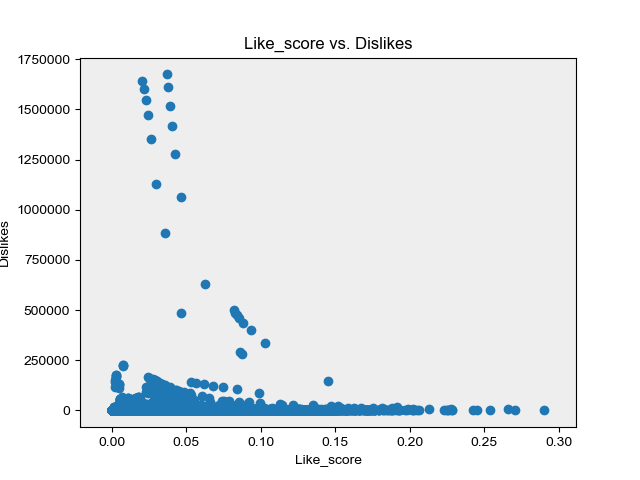


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [01/Apr/2018 19:23:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2018 19:23:59] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2018 19:23:59] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...


In [190]:
#Use scatterplot with labels to identify points

#scatterplot_youtube_old(trending_videos,'like_score','views', 24592,'ALL',10,8)
#scatterplot_youtube_old(trending_videos,'like_score','likes', 24592,'ALL',10,8)
scatterplot_youtube_old(trending_videos,'like_score','dislikes', 24592,'ALL',10,8)


#def scatterplot_youtube_old(df, x_axis, y_axis,num_data, cat, figsize_x, figsize_y):

<IPython.core.display.Javascript object>


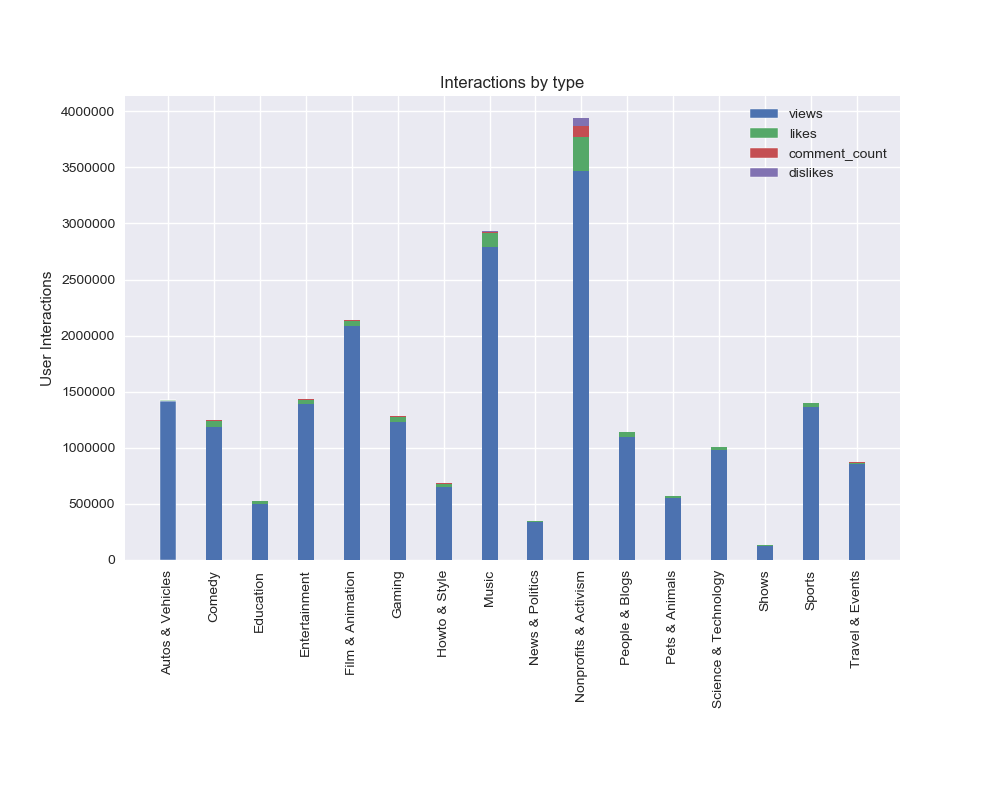

<IPython.core.display.Javascript object>


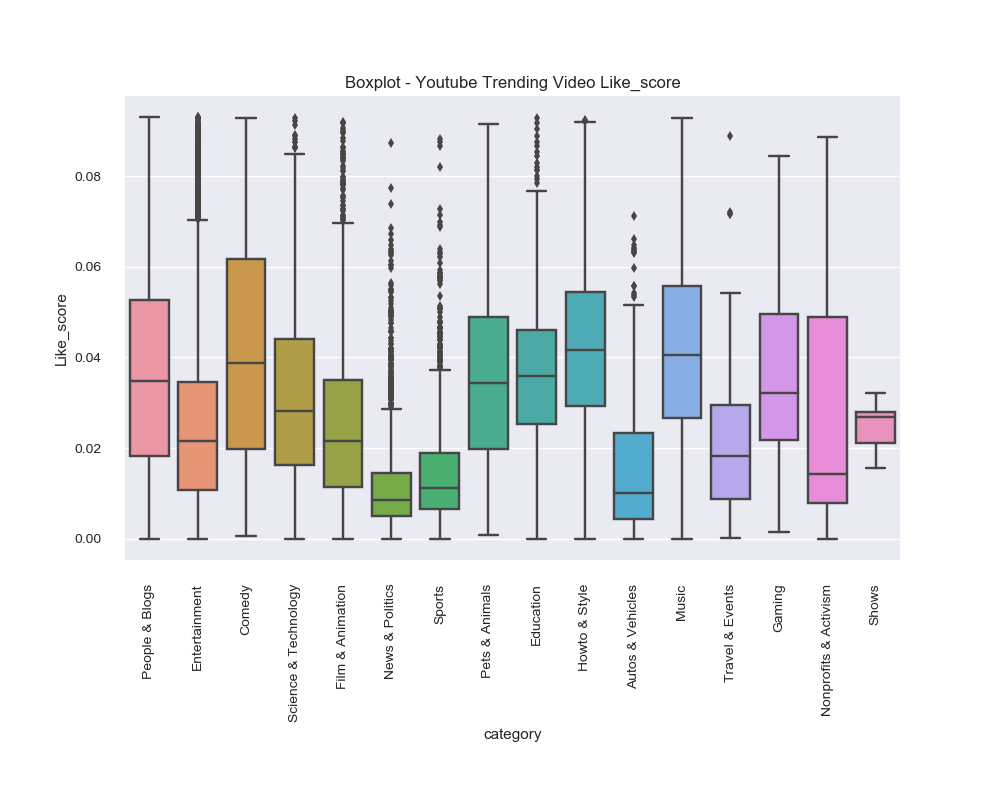

In [306]:
#plots based on the 4 metrics
top_trending_videos_by_category = trending_videos.groupby(['category'])[["views", "likes", "comment_count","dislikes"]].mean().reset_index()
type_plot_list = ['views', 'likes', 'comment_count', 'dislikes']
category_list = list(top_trending_videos_by_category.category.unique())


stacked_plot(top_trending_videos_by_category, type_plot_list, category_list, .35, .3)
plot_youtube(trending_videos,'','like_score', 24592,'ALL',10,8, .3, 'boxplot',1)


#for column in type_plot_list:
    #plot_youtube(trending_videos,'category',column, 24592,'ALL',10,6, .3, 'barplot',0)
    #plot_youtube(trending_videos,'title',column, 300,'Comedy',10,10, .6, 'barplot',0)
    #plot_youtube(trending_videos,'',column, 24592,'ALL',10,6, .3, 'hist',0)
    #plot_youtube(trending_videos,'',column, 24592,'Comedy',10,6, .3, 'hist',0)
    #plot_youtube(trending_videos,'',column, 24592,'ALL',10,8, .3, 'boxplot',0)
    #plot_youtube(trending_videos,'',column, 24592,'ALL',10,8, .3, 'boxplot',1)
    #plot_youtube(trending_videos,'like_score',column, 24592,'ALL',10,8, .3, 'scatterplot',0)




In [165]:
#tf-idf functions
def tf(word, blob):
    return blob.count(word) / len(blob)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [228]:
title_dict_views = dict(zip(trending_videos[trending_videos['category'] == 'Comedy']['title'], trending_videos[trending_videos['category'] == 'Comedy']['views']))
title_dict_likes = dict(zip(trending_videos[trending_videos['category'] == 'Comedy']['title'], trending_videos[trending_videos['category'] == 'Comedy']['likes']))



def cleanup(title):
    word_mapping = {
        
    }
    words = title.split()
    words = [word.lower() for word in words if word.isalpha()]
    words = [word_mapping.get(word, word) for word in words]
    
    return tuple(words)

In [233]:
def clean_and_compute_tfidf(dict):

    cleaned_titles = [cleanup(t) for t in dict]
    words={}
    words = {word for words in cleaned_titles for word in words}

    word_values = {word: 0.0 for word in words}

    for word in words:
        for t, cleaned in zip(dict, cleaned_titles):
            if len(cleaned) > 0:
                word_values[word] += dict[t] * tfidf(word, cleaned, cleaned_titles)
    return word_values

In [236]:
views_idf_vals = {}
likes_idf_vals = {}

views_idf_vals = clean_and_compute_tfidf(title_dict_views)
likes_idf_vals = clean_and_compute_tfidf(title_dict_likes)

In [259]:

df = pd.Series(views_idf_vals).to_frame()
df

,0
a,2.329642e+07
aaron,4.139211e+05
abbi,1.821360e+04
about,3.543250e+06
accordion,1.596768e+04
account,2.712576e+03
accused,5.561026e+04
actress,1.224294e+05
acts,1.844069e+06
actually,5.256185e+05


In [257]:
#df = pd.DataFrame(views_idf_vals, index=[0])
#df
views_idf_vals

{'over': 1638302.6393252497,
 'call': 335239.36716907995,
 'a': 23296417.83836391,
 'just': 1235239.3765252281,
 'assault': 92035.79383732902,
 'only': 830661.0625122273,
 'solo': 195982.0817814464,
 'cuddle': 154068.57094239083,
 'dollar': 7383617.755803886,
 'original': 407643.6899947913,
 'russian': 2409.0557148576304,
 'gucci': 1495155.6989429845,
 'nyc': 999115.3425964823,
 'litfam': 1269042.4227998904,
 'fantasy': 6829015.694030112,
 'finding': 1313823.9288663364,
 'ice': 46128.01756174544,
 'dornan': 603443.2213846897,
 'killer': 265945.64884169574,
 'hugh': 220562.77292339658,
 'career': 53054.552684348,
 'my': 33825926.55835924,
 'cold': 2211363.673268423,
 'artist': 1024015.3262767824,
 'teen': 633054.5137548425,
 'kristen': 961188.529281253,
 'shorts': 9981581.276165865,
 'ucb': 18213.604776242686,
 'like': 1728265.938006199,
 'franco': 1065104.0162123088,
 'vomited': 132396.29826686485,
 'scott': 69948.20586750319,
 'mark': 150173.36075744772,
 'interviews': 7674160.3103249

In [278]:
#len(views_idf_vals)
#len(likes_idf_vals)

pd.Series(views_idf_vals).to_frame()

comedy_views = pd.Series(views_idf_vals).to_frame()
comedy_likes = pd.Series(likes_idf_vals).to_frame()
comedies = pd.concat([comedy_views, comedy_likes], axis=1)

comedies.reset_index(level=0, inplace=True)
comedies.columns = ['title','views', 'likes']
comedies['like_view_ratio'] = comedies['likes']/comedies['views']
comedies.sort_values(['like_view_ratio'], ascending=[False])

,title,views,likes,like_view_ratio
752,mister,9.935612e+05,1.423612e+05,0.143284
461,glassman,9.935612e+05,1.423612e+05,0.143284
994,scotty,9.935612e+05,1.423612e+05,0.143284
1032,sire,9.935612e+05,1.423612e+05,0.143284
277,dean,1.698450e+05,2.329545e+04,0.137157
251,cup,1.698450e+05,2.329545e+04,0.137157
915,puppy,9.522788e+04,1.246942e+04,0.130943
711,many,9.522788e+04,1.246942e+04,0.130943
111,bloopers,1.026231e+07,1.339723e+06,0.130548
659,leaving,2.108824e+04,2.481492e+03,0.117672


<IPython.core.display.Javascript object>


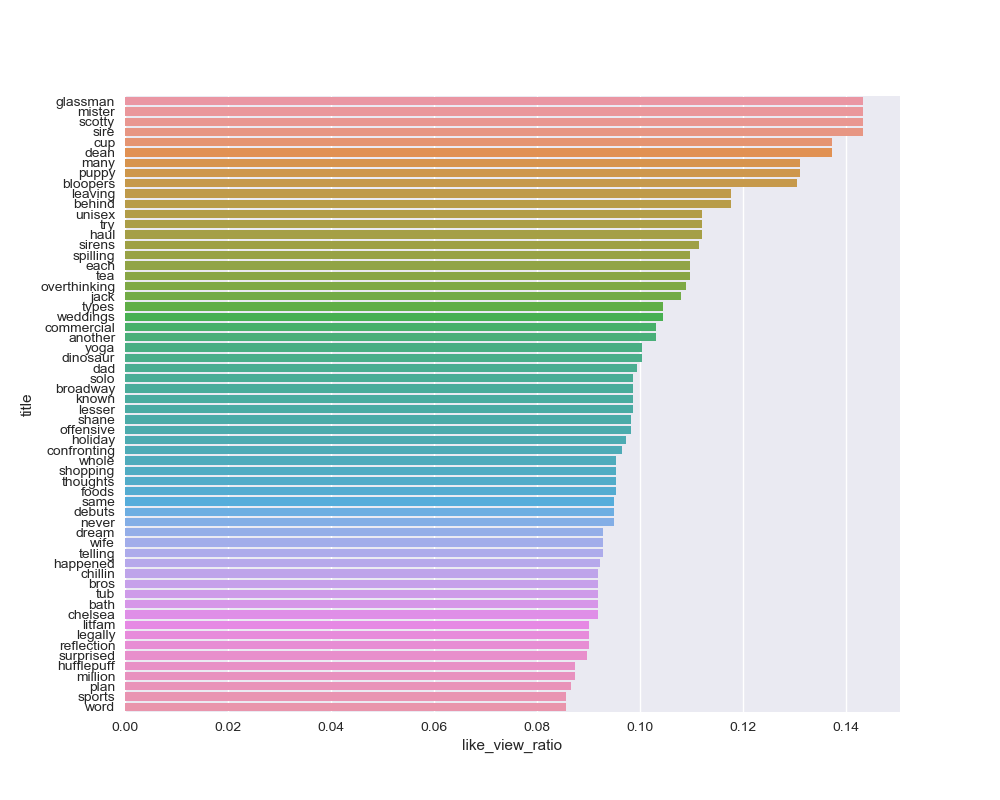

In [304]:
#barplot_youtube(comedies, 'title', 'like_view_ratio',5, 'ALL', 10, 8, .2)

df = comedies
num_data = 60
x_axis = 'title'
y_axis = 'like_view_ratio'

plt.figure(figsize=(10, 8))
result = df.sort_values([y_axis], ascending = [False]).head(num_data).groupby([x_axis])[y_axis].aggregate(np.mean).reset_index().sort_values(y_axis,ascending=[False])
sns.barplot(x=y_axis, y=x_axis, data=df.sort_values([y_axis], ascending = [False]).head(num_data), order=result[x_axis])            
#plt.title('Top ' + x_axis.capitalize() + ' by ' + y_axis.capitalize())

    
#plt.xticks(rotation=90)
plt.show()
#plt.gcf().subplots_adjust(bottom=.3)  